In [1]:
import time
from statemachine import StateMachine, State, Event

In [2]:
# DOC: https://python-statemachine.readthedocs.io/en/latest/actions.html

##################################################################################################################################################################################################################################################################################################################################################################
##### FINITE STATE MACHINE FOR POPEYE ORDER CONTROL ##############################################################################################################################################################################################################################################################################################################
class PopeyeFSM(StateMachine): 
    ###### PARAMS ################################################################################################################################################################################################################################################################################################################################################
    option = 0
    
    ###### STATES ################################################################################################################################################################################################################################################################################################################################################
    ### Start and end states
    idle       = State('Idle', initial=True)
    terminated = State('Terminated', final=True)
    
    ### Standard states
    # standard__idle        = State('Standard__Idle')
    # standard__change_mode = State('Standard__ChangeMode')
    # standard__armed       = State('Standard__Armed')
    # standard__takeoff     = State('Standard__Takeoff')
    # standard__reposition  = State('Standard__Reposition')
    # standard__landed      = State('Standard__Land')
    # standard__disarmed    = State('Standard__Disarmed')
    
    # ### Olive Following
    # olive_following__idle = State('OliveFollowing__Idle')
    
    # ### Firefighter states
    fire_fighter__wait_for_GPS_coor      = State('FireFighter__Idle')
    fire_fighter__write_approach_mission = State('FireFighter__WriteMission')
    fire_fighter__wait_for_validation    = State('FireFighter__WaitForValidation')
    fire_fighter__do_appraoch_mission    = State('FireFighter__DoMission')
    fire_fighter__target_aquisition      = State('FireFighter__TargetAquisition')
    fire_fighter__fire_hydrant_drop      = State('FireFighter__FireHydrantDrop')
    fire_fighter__rtl                    = State('FireFighter__Rtl')

    ###### EVENTS ################################################################################################################################################################################################################################################################################################################################################
    ### Start and end events
    event       = Event(idle.to(terminated, cond=lambda: PopeyeFSM.option==0)
                               | idle.to(fire_fighter__wait_for_GPS_coor, cond=lambda: PopeyeFSM.option==1))
    event_FIREFIGHTING = Event(fire_fighter__wait_for_GPS_coor.to(fire_fighter__write_approach_mission)
                               | fire_fighter__write_approach_mission.to(fire_fighter__wait_for_validation)
                               | fire_fighter__wait_for_validation.to(fire_fighter__do_appraoch_mission)
                               | fire_fighter__do_appraoch_mission.to(fire_fighter__target_aquisition)
                               | fire_fighter__target_aquisition.to(fire_fighter__fire_hydrant_drop)
                               | fire_fighter__fire_hydrant_drop.to(fire_fighter__rtl)
                               | fire_fighter__rtl.to(idle))
        
    def __init__(self):
        super(PopeyeFSM, self).__init__()
        
    ###### STATE AND TRANSITION ACTIONS ####################################################################################################################################################################################################################################################################################################################################################################################################################################
    ### Start and end states
    @idle.enter
    def on_ener__idle(self):
        print("\n[FSM] ----------------- POPEYE MENU -----------------")
        print("[FSM] 1- Select a mission")
        print("[FSM] 0- Terminate POPEYE")
        time.sleep(0.2)
        choice = input("\n[FSM] Select an option: ")
        if choice.isdigit() and int(choice) in [0, 1]:
            PopeyeFSM.option = int(choice)
        else:
            print("[FSM] Invalid option. Please select a valid number.")
        print("[FSM] -----------------------------------------------\n")
        self.send('event')
    @terminated.enter
    def on_enter__terminated(self):
        print("\n[FSM] As terminated. Goodbye!")
        time.sleep(0.2)
        
    ### Firefighter states
    @fire_fighter__wait_for_GPS_coor.enter
    def on_enter__wait_for_GPS_coor(self):
        print("[FSM] > WAIT FOR TARGET COORDONATES.")
        print("[FSM] > TARGET COORDONATES ACQUIRED.")
        time.sleep(1.5)
        self.send("event_FIREFIGHTING")
    @fire_fighter__write_approach_mission.enter
    def on_enter__write_approach_mission(self):
        print("[FSM] > WRITING APPROACH MISSION.")
        print("[FSM] > APPROACH MISSION WRITTEN.")
        time.sleep(1.5)
        self.send("event_FIREFIGHTING")
    @fire_fighter__wait_for_validation.enter
    def on_enter__wait_for_validation(self):
        print("[FSM] > WAITING FOR VALIDATION.")
        time.sleep(1.5)
        self.send("event_FIREFIGHTING")
    @fire_fighter__do_appraoch_mission.enter
    def on_enter__do_appraoch_mission(self):
        print("[FSM] > DOING APPROACH MISSION.")
        print("[FSM] > APPROACH MISSION DONE.")
        time.sleep(1.5)
        self.send("event_FIREFIGHTING")
    @fire_fighter__target_aquisition.enter
    def on_enter__target_aquisition(self):
        print("[FSM] > ACQUIRING TARGET.")
        print("[FSM] > TARGET ACQUIRED.")
        time.sleep(1.5)
        self.send("event_FIREFIGHTING")
    @fire_fighter__fire_hydrant_drop.enter
    def on_enter__fire_hydrant_drop(self):
        print("[FSM] > DROPPING FIRE HYDRANT.")
        print("[FSM] > FIRE HYDRANT DROPPED.")
        time.sleep(1.5)
        self.send("event_FIREFIGHTING")
    @fire_fighter__rtl.enter
    def on_enter__rtl(self):
        print("[FSM] > RETURNING TO LAUNCH.")
        print("[FSM] > RETURNED TO LAUNCH.")
        time.sleep(1.5)
        self.send("event_FIREFIGHTING")
    
sm = PopeyeFSM()


[FSM] ----------------- POPEYE MENU -----------------
[FSM] 1- Select a mission
[FSM] 0- Terminate POPEYE
[FSM] -----------------------------------------------


[FSM] As terminated. Goodbye!


In [4]:
sm = PopeyeFSM()
img_path = "POPEYE.png"
sm._graph().write_png(img_path)


[FSM] ----------------- POPEYE MENU -----------------
[FSM] 1- Select a mission
[FSM] 0- Terminate POPEYE
[FSM] -----------------------------------------------


[FSM] As terminated. Goodbye!


In [6]:
img_path = "POPEYE.png"
sm._graph().write_png(img_path)

In [ ]:
class OrderControl(StateMachine):
    payment = State(initial=True)
    processing = State()
    shipping = State()
    completed = State(final=True)

    add_to_order = payment.to(payment)
    receive_payment = (
        payment.to(processing, cond="payments_enough")
        | payment.to(payment, unless="payments_enough")
    )
    process_order = processing.to(shipping, cond="payment_received")
    ship_order = shipping.to(completed)

    def __init__(self):
        super(OrderControl, self).__init__()
        self.order_total = 0
        self.payments = []
        self.payment_received = False
        
    def before_add_to_order(self, amount):
        self.order_total += amount
        return self.order_total
        
    def on_enter_add_to_order(self):
        self.payment_received = False
        
    def payments_enough(self, amount):
        return sum(self.payments) + amount >= self.order_total
        
    def before_receive_payment(self, amount):
        self.payments.append(amount)
        return self.payments

    def after_receive_payment(self):
        self.payment_received = True

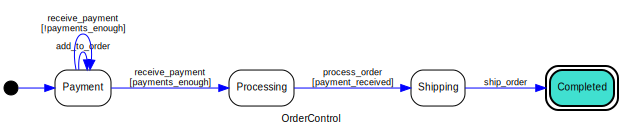

In [ ]:
sm

In [ ]:
class TrafficLightMachine(StateMachine):
    "A traffic light machine"
    green = State(initial=True)
    yellow = State()
    red = State()

    cycle = (
        green.to(yellow)
        | yellow.to(red)
        | red.to(green)
    )

    def before_cycle(self, event: str, source: State, target: State, message: str = ""):
        message = ". " + message if message else ""
        return f"Running {event} from {source.id} to {target.id}{message}"

    def on_enter_red(self):
        print("Don't move.")

    def on_exit_red(self):
        print("Go ahead!")

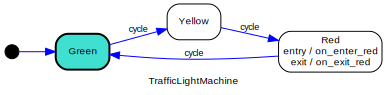

In [ ]:
sm = TrafficLightMachine()
sm

In [ ]:
sm.send("cycle", message="Please, now slowdown.")

'Running cycle from green to yellow. Please, now slowdown.'

In [ ]:
sm = OrderControl()

In [ ]:
img_path = "readme_addorder.png"
sm._graph().write_png(img_path)

In [ ]:
sm.send("ship_order", 100)
sm.current_state

State('Completed', id='completed', value='completed', initial=False, final=True)